# Project title: Sentiment Analysis on Tweets about Brands and Products


- Student names: 
    - INGAVI KILAVUKA
    - CALVIN OMWEGA
    - ALVIN KIMATHI
    - Ronny Kabiru
- Instructor name: Maryann Mwikali
- DATASET/MODELING FOCUS: NLP(Natural language processing)


Objective:
To analyze the sentiment of tweets directed at various brands and products to understand public perception. This will involve determining whether the sentiment expressed in tweets is positive, negative, or neutral and identifying the specific brands and products mentioned.


Problem Definition:
In the age of social media, understanding public sentiment towards brands and products is crucial for businesses. This project aims to:
1. **Identify the Sentiment**: Determine whether the sentiment expressed in each tweet is positive, negative, or neutral.
2. **Target Identification**: Identify the specific brand or product that the sentiment is directed towards.
3. **Trends and Insights**: Derive insights and trends regarding public perception of various brands and products.


Research Questions:
1. **Sentiment Classification**: What is the distribution of positive, negative, and neutral sentiments across the dataset?
2. **Brand/Product Association**: Which brands and products are most frequently mentioned, and what is the associated sentiment for each?
3. **Temporal Trends**: Are there any notable trends in sentiment over time for specific brands or products?

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: google-auth-oauthlib<1.1,>=0.5 in c:\users\homepc\anaconda3\envs\learn-env\lib\site-packages (from tensorboard<2.14,>=2.13->tensorflow-intel==2.13.0->tensorflow) (1.0.0)



In [2]:
pip install scikeras

  Using cached scikeras-0.12.0-py3-none-any.whl.metadata (4.0 kB)
  Using cached scikit_learn-1.3.2-cp38-cp38-win_amd64.whl.metadata (11 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
Using cached scikeras-0.12.0-py3-none-any.whl (27 kB)
   ---------------------------------------- 9.3/9.3 MB 2.3 MB/s eta 0:00:00
   ---------------------------------------- 301.8/301.8 kB 2.7 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 0.17.0
    Uninstalling joblib-0.17.0:
      Successfully uninstalled joblib-0.17.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2

    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2


In [3]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [6]:
#libraries 
# import necessary libraries
import re
import string
import nltk
import pandas as pd
import numpy as np
from textblob import TextBlob
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, LSTM, Dense, GRU
from keras.models import Sequential
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier 

ImportError: cannot import name 'defun_with_attributes' from 'tensorflow.python.eager.function' (c:\Users\HomePC\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\eager\function.py)

In [7]:
import pandas as pd

# Load the dataset
df = pd.read_csv('judge_1377884607_tweet_product_company.csv')
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [8]:
df.shape

(8721, 3)

In [9]:
def explore_dataset(df):
    # Display column names
    print("Column Names:")
    print(df.columns.tolist())
    print("\n")

    # Display data types
    print("Data Types:")
    print(df.dtypes)
    print("\n")

    # Display number of rows and columns
    print("Shape of the DataFrame:")
    print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
    print("\n")

    # DataFrame info
    print("DataFrame Info:")
    df.info()
    print("\n")

    # Descriptive statistics for numerical columns
    print("Descriptive Statistics:")
    print(df.describe())
    print("\n")

    # Missing values summary
    print("Missing Values (Percentage):")
    missing_values_percentage = (df.isnull().sum() / len(df)) * 100
    print(missing_values_percentage)
    print("\n")

    # Display summary statistics for categorical columns
    print("Categorical Data Summary:")
    categorical_summary = df.select_dtypes(include=['object']).describe()
    print(categorical_summary)
    print("\n")

    # Value counts for categorical columns
    print("Value Counts for Categorical Columns:")
    for column in df.select_dtypes(include=['object']).columns:
        print(f"Column: {column}")
        print(df[column].value_counts(dropna=False))
        print("\n")

explore_dataset(df)

Column Names:
['tweet_text', 'emotion_in_tweet_is_directed_at', 'is_there_an_emotion_directed_at_a_brand_or_product']


Data Types:
tweet_text                                            object
emotion_in_tweet_is_directed_at                       object
is_there_an_emotion_directed_at_a_brand_or_product    object
dtype: object


Shape of the DataFrame:
Rows: 8721, Columns: 3


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8721 entries, 0 to 8720
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          8720 non-null   object
 1   emotion_in_tweet_is_directed_at                     3169 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  8721 non-null   object
dtypes: object(3)
memory usage: 204.5+ KB


Descriptive Statistics:
                              

In [11]:
df.dropna(subset=['tweet_text'], inplace=True)

Removing URLs

In [12]:
import re

def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

# Apply the function to the tweet column
df['cleaned_text'] = df['tweet_text'].apply(remove_urls)

# Display the first few rows to verify the changes
df[['tweet_text', 'cleaned_text']].head()


,tweet_text,cleaned_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,.@wesley83 I have a 3G iPhone. After 3 hrs twe...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,@jessedee Know about @fludapp ? Awesome iPad/i...
2,@swonderlin Can not wait for #iPad 2 also. The...,@swonderlin Can not wait for #iPad 2 also. The...
3,@sxsw I hope this year's festival isn't as cra...,@sxsw I hope this year's festival isn't as cra...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,@sxtxstate great stuff on Fri #SXSW: Marissa M...


Removing special characters

In [13]:
def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

# Apply the function to the cleaned_text column
df['cleaned_text'] = df['cleaned_text'].apply(remove_special_characters)

# Display the first few rows to verify the changes
df[['tweet_text', 'cleaned_text']].head()

,tweet_text,cleaned_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,wesley83 I have a 3G iPhone After 3 hrs tweeti...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,jessedee Know about fludapp Awesome iPadiPhon...
2,@swonderlin Can not wait for #iPad 2 also. The...,swonderlin Can not wait for iPad 2 also They s...
3,@sxsw I hope this year's festival isn't as cra...,sxsw I hope this years festival isnt as crashy...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,sxtxstate great stuff on Fri SXSW Marissa Maye...


Removing stopwords

In [14]:
import nltk
from nltk.corpus import stopwords

# Download stopwords from NLTK
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word.lower() not in stop_words])

# Apply the function to the cleaned_text column
df['cleaned_text'] = df['cleaned_text'].apply(remove_stopwords)

# Display the first few rows to verify the changes
df[['tweet_text', 'cleaned_text']].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HomePC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,tweet_text,cleaned_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,wesley83 3G iPhone 3 hrs tweeting RISEAustin d...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,jessedee Know fludapp Awesome iPadiPhone app y...
2,@swonderlin Can not wait for #iPad 2 also. The...,swonderlin wait iPad 2 also sale SXSW
3,@sxsw I hope this year's festival isn't as cra...,sxsw hope years festival isnt crashy years iPh...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,sxtxstate great stuff Fri SXSW Marissa Mayer G...


In [15]:
from nltk.tokenize import word_tokenize

# Download punkt for tokenization
nltk.download('punkt')

def tokenize_text(text):
    return word_tokenize(text)

# Apply the function to the cleaned_text column
df['tokens'] = df['cleaned_text'].apply(tokenize_text)

# Display the first few rows to verify the changes
df[['tweet_text', 'cleaned_text', 'tokens']].head()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HomePC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,tweet_text,cleaned_text,tokens
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,wesley83 3G iPhone 3 hrs tweeting RISEAustin d...,"[wesley83, 3G, iPhone, 3, hrs, tweeting, RISEA..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,jessedee Know fludapp Awesome iPadiPhone app y...,"[jessedee, Know, fludapp, Awesome, iPadiPhone,..."
2,@swonderlin Can not wait for #iPad 2 also. The...,swonderlin wait iPad 2 also sale SXSW,"[swonderlin, wait, iPad, 2, also, sale, SXSW]"
3,@sxsw I hope this year's festival isn't as cra...,sxsw hope years festival isnt crashy years iPh...,"[sxsw, hope, years, festival, isnt, crashy, ye..."
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,sxtxstate great stuff Fri SXSW Marissa Mayer G...,"[sxtxstate, great, stuff, Fri, SXSW, Marissa, ..."


In [ ]:
# sentiment analysis

# Function to perform sentiment analysis and create a frequency table
def analyze_sentiments_and_plot_frequency(df, tweet_text):
    # Creating a TextBlob object for each tweet and calculate sentiment
    df['sentiment'] = df[tweet_text].apply(lambda x: TextBlob(x).sentiment.polarity)
    
    # Define sentiment labels
    def get_sentiment_label(sentiment):
        if sentiment > 0:
            return 'Positive'
        elif sentiment < 0:
            return 'Negative'
        else:
            return 'Neutral'
    
    df['sentiment_label'] = df['sentiment'].apply(get_sentiment_label)
    
    # Create a frequency table for sentiment labels
    sentiment_counts = Counter(df['sentiment_label'])
    return sentiment_counts

sentiment_counts = analyze_sentiments_and_plot_frequency(df, 'tweet_text')
analyze_sentiments_and_plot_frequency(df, 'tweet_text')
print(sentiment_counts)

Counter({'Positive': 4299, 'Neutral': 3229, 'Negative': 1192})


bar plot

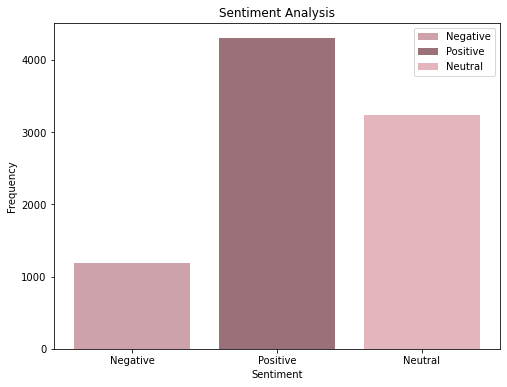

In [ ]:
# Define colors for the bar plot
colors = {
    'Positive': '#9b7179',
    'Negative': '#cda2aa',
    'Neutral': '#e5b5be'
}

# Plot a bar graph for sentiment frequency with a legend
plt.figure(figsize=(8, 6))
bars = plt.bar(sentiment_counts.keys(), sentiment_counts.values(), color=[colors[label] for label in sentiment_counts.keys()])

# Add legend
for bar, label in zip(bars, sentiment_counts.keys()):
    bar.set_label(label)
plt.legend()

plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Sentiment Analysis')
plt.show()